# Project 3

In the coding project below, answer relevant questions on Canvas via the assigment named Programming Project 3 Quiz Questions.

In the following exercise, we will perform linear regression to fit various data sets and to predict outputs. Perform the following analyses by starting a new notebook. 

In this assignment, we will be using PennGrader, a Python package built by a former TA for autograding Python notebooks. PennGrader was developed to provide students with instant feedback on their answer. You can submit your answer and know whether it's right or wrong instantly. We then record your most recent answer in our backend database. You will have 100 attempts per test case, which should be more than sufficient.

<b>NOTE：Please remember to remove the </b>

```python
raise notImplementedError
```
<b>after your implementation, otherwise the cell will not compile.</b>

## Getting Setup
Please run the below cells to get setup with the autograder. If you need to install packages, please uncomment and try the following lines; if they do not work, please try running them in the terminal without the `!` sign! (e.g. `pip install sklearn --user`

In [1]:
%%capture
!pip install penngrader --user

In [2]:
# !pip install seaborn --user
# !pip install sklearn --user
# !pip install statsmodels --user

Let's try PennGrader out! Fill in the cell below with your PennID and then run the following cell to initialize the grader.

<font color='red'>Warning:</font> Please make sure you only have one copy of the student notebook in your directory in Codio upon submission. The autograder looks for the variable `STUDENT_ID` across all notebooks, so if there is a duplicate notebook, it will fail.

In [3]:
#PLEASE ENSURE YOUR STUDENT_ID IS ENTERED AS AN INT (NOT A STRING). IF NOT, THE AUTOGRADER WON'T KNOW WHO 
#TO ASSIGN POINTS TO YOU IN OUR BACKEND

STUDENT_ID = 56803282                   # YOUR 8-DIGIT PENNID GOES HERE
STUDENT_NAME = "Jacky Choi"     # YOUR FULL NAME GOES HERE

In [4]:
import penngrader.grader

grader = penngrader.grader.PennGrader(homework_id = 'ESE542_Online_Su_2021_HW3', student_id = STUDENT_ID)

In [5]:
# Let's import the relevant Python packages here
# Feel free to import any other packages for this project

# Data Wrangling
import pandas as pd
import numpy as np
import math

# ML
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Statistics
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Evaluation Metrics
from sklearn.metrics import mean_squared_error

# Plotting
import matplotlib.pyplot as plt
blue = '#008FD5'
red = '#FF2700'
green = '#77AB43'

%matplotlib inline

## Data Leakage

A very important (read: **the most important** topic) in practical data science scenarios is that of data leakage. Data leakage is a situation that occurs when the creator of a machine learning model allows the model to read both training data and test data to train the model. In Programming Project 3, the training data and the test data are separated for you already. Thus, the linear regression model should only be trained with the training data. Predictions can be made on either the training data or the test data. In the upcoming weeks, we will explore why you shouldn't train the model with the test data as well and what methods we can employ to choose the training set and the test set.

## Part A

First, we will use the `Ch3PartA` dataset to generate polynomial regressions using `scikit-learn`.
This dataset contains 100 observations of points $x$ and their corresponding response, $y$. The data
is divided into a training set $(x_{tr}, y_{tr})$ and a test set $(x_{te}, y_{te})$, and all the values are doubles.

### A1.

To start, load `Ch3PartA.csv` into your notebook.

In [6]:
data = pd.read_csv("Ch3PartA.csv")
data2 = data.copy() #just for fun
data

,x_tr,y_tr,x_te,y_te
0,0.249973,-0.225565,0.006047,0.043946
1,0.073364,0.435610,0.483860,-0.066113
2,0.663146,0.507205,0.123247,0.859564
3,0.595366,0.059467,0.307679,-0.305032
4,0.415146,-0.035114,0.926060,-0.472700
...,...,...,...,...
95,0.320401,-0.488202,0.897397,-0.735587
96,0.164287,0.251095,0.119381,0.865596
97,0.783161,-0.291251,0.327843,-0.391891
98,0.122498,0.403176,0.815745,-0.400014


### A2.

Create a scatter plot of: 

(a) `y_tr` against `x_tr` and another of 

(b) `y_te` against `x_te`. 


Then, observe and comment on the similarities and differences between the plots.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   x_tr   R-squared (uncentered):                   0.117
Model:                            OLS   Adj. R-squared (uncentered):              0.108
Method:                 Least Squares   F-statistic:                              13.12
Date:                Sat, 21 Sep 2024   Prob (F-statistic):                    0.000463
Time:                        17:10:45   Log-Likelihood:                         -75.154
No. Observations:                 100   AIC:                                      152.3
Df Residuals:                      99   BIC:                                      154.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y_tr          -0.4524      0.125     -3.622      0.000      -0.700      -0.205
==============================================================================
Omnibus:                        4.046   Durbin-Watson:                   0.443
Prob(Omnibus):                  0.132   Jarque-Bera (JB):                3.664
Skew:                           0.391   Prob(JB):                        0.160
Kurtosis:                       2.481   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

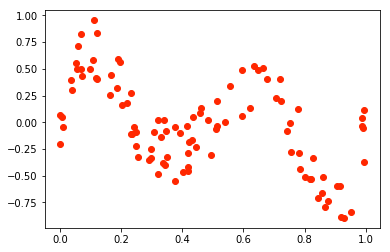

In [7]:
plt.plot(data['x_tr'], data['y_tr'], 'o', color = red)
model = sm.OLS(data[['x_tr']], data[['y_tr']])
model = model.fit()
model.summary()

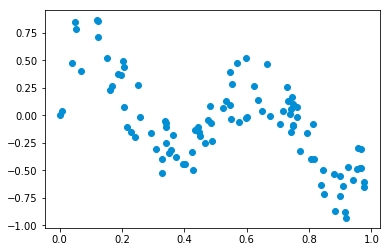

In [8]:
plt.plot(data['x_te'], data['y_te'], 'o', color = blue)

What is the maximum value of `y` in the training set and in the test set? Please store these variables as `max_y_train` and `max_y_test` below and run the first grader cell! 

If you get 1 point, it means that you got both right. If you receive 0.5 points, you had only one right, and if you receive 0.25 points, then you correctly entered a tuple but both values were incorrect.

In [9]:
#dataframe['column_name'].max()

In [10]:
max_y_train = data['y_tr'].max()
max_y_test = data['y_te'].max()

In [11]:
# View the results here before you submit
print(max_y_train, max_y_test)

0.95500282089616 0.8655959436070828


In [12]:
grader.grade(test_case_id = 'test_y_train_test', answer = (max_y_train, max_y_test))

Correct! You earned 1.0/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Now, comment on the plot differences below. Please record your response into the multiline string named `plot_diffs_string` and then submit it to us via the grader cell!

In [13]:
plot_diffs_string = '''
The training set has more spread out data points than the test set with a much higher max value of 0.96 compared to 0.87 if rounded to 2 decimal points.
'''


In [14]:
grader.grade(test_case_id = 'test_plot_diff_test', answer = plot_diffs_string)

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### A3. 
Generate the necessary features to fit polynomial regressions up to the 20th degree (up to and including the $x_{20}$ term) on the training data. Hint: You will be fitting multi-variate linear regression models with polynomial features of $x$. Familiarize yourself with `sklearn.preprocessing.PolynomialFeatures`. 

Here, we're just asking you to practice generating the features. You'll pass one of them into the autograder for a quick check (although the autograder will not be very strict, so if you end up failing the next test case definitely make sure your work here is correct!)

In [15]:
x_train = data[['x_tr']]
poly = PolynomialFeatures(degree=20)
x_train = poly.fit_transform(x_train)

Now, let's check to make sure your highest-degree polynomial features are correct; namely the set of features that includes $x_{20}$, or `PolynomialFeatures(degree = 20)`. Please set `polynomial_features_df` as this **dataframe**.

If you do not receive full points, that means that either you have the wrong number of columns or some column values aren't correct!

In [16]:
polynomial_features_df = pd.DataFrame(x_train)
polynomial_features_df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,0.249973,0.062486,0.015620,0.003905,0.000976,2.439818e-04,6.098884e-05,1.524556e-05,3.810976e-06,...,2.381343e-07,5.952713e-08,1.488017e-08,3.719639e-09,9.298089e-10,2.324270e-10,5.810045e-11,1.452354e-11,3.630491e-12,9.075243e-13
1,1.0,0.073364,0.005382,0.000395,0.000029,0.000002,1.559195e-07,1.143889e-08,8.392034e-10,6.156737e-11,...,3.313732e-13,2.431089e-14,1.783546e-15,1.308482e-16,9.599553e-18,7.042623e-19,5.166754e-20,3.790541e-21,2.780895e-22,2.040178e-23
2,1.0,0.663146,0.439763,0.291627,0.193391,0.128247,8.504639e-02,5.639820e-02,3.740025e-02,2.480184e-02,...,1.090693e-02,7.232889e-03,4.796463e-03,3.180757e-03,2.109307e-03,1.398779e-03,9.275950e-04,6.151311e-04,4.079219e-04,2.705119e-04
3,1.0,0.595366,0.354461,0.211034,0.125643,0.074803,4.453545e-02,2.651491e-02,1.578608e-02,9.398503e-03,...,3.331404e-03,1.983406e-03,1.180853e-03,7.030403e-04,4.185665e-04,2.492004e-04,1.483656e-04,8.833186e-05,5.258982e-05,3.131021e-05
4,1.0,0.415146,0.172346,0.071549,0.029703,0.012331,5.119210e-03,2.125218e-03,8.822750e-04,3.662726e-04,...,6.312559e-05,2.620631e-05,1.087944e-05,4.516551e-06,1.875027e-06,7.784092e-07,3.231532e-07,1.341556e-07,5.569413e-08,2.312118e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,0.320401,0.102657,0.032891,0.010538,0.003377,1.081846e-03,3.466249e-04,1.110591e-04,3.558347e-05,...,3.652891e-06,1.170391e-06,3.749948e-07,1.201488e-07,3.849584e-08,1.233412e-08,3.951866e-09,1.266183e-09,4.056867e-10,1.299825e-10
96,1.0,0.164287,0.026990,0.004434,0.000728,0.000120,1.966150e-05,3.230126e-06,5.306672e-07,8.718165e-08,...,2.353047e-09,3.865747e-10,6.350914e-11,1.043372e-11,1.714122e-12,2.816077e-13,4.626444e-14,7.600639e-15,1.248685e-15,2.051425e-16
97,1.0,0.783161,0.613342,0.480346,0.376188,0.294616,2.307320e-01,1.807004e-01,1.415176e-01,1.108311e-01,...,6.797735e-02,5.323724e-02,4.169335e-02,3.265262e-02,2.557228e-02,2.002722e-02,1.568455e-02,1.228353e-02,9.619988e-03,7.534004e-03
98,1.0,0.122498,0.015006,0.001838,0.000225,0.000028,3.378867e-06,4.139039e-07,5.070235e-08,6.210929e-09,...,9.319950e-11,1.141674e-11,1.398526e-12,1.713165e-13,2.098590e-14,2.570728e-15,3.149087e-16,3.857564e-17,4.725434e-18,5.788555e-19


In [17]:
grader.grade(test_case_id = 'test_poly_coefficients_setups', answer = polynomial_features_df)

Correct! You earned 1.0/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### A4. 
Calculate the training MSE and the test MSE for 20 polynomial models up to degree 20. Store these as lists named `mse_train` and `mse_test` respectively. Hint: Familiarize yourself with the `sklearn.metrics.mean_squared_error` package and try to automate the process, e.g., using a for loop with degrees going from 1 to 20.

In [18]:
mse_train = []
mse_test = []

for i in range(1,21):
    poly = PolynomialFeatures(degree=i)
    x_tr = poly.fit_transform(data[['x_tr']])
    x_te = poly.fit_transform(data[['x_te']])
    
    model = LinearRegression()
    model.fit(x_tr, data[['y_tr']])
    
    y_tr_pred = model.predict(x_tr)
    y_te_pred = model.predict(x_te)
    
    mse_train.append(mean_squared_error(data[['y_tr']], y_tr_pred))
    mse_test.append(mean_squared_error(data[['y_te']], y_te_pred))



Run the grader cells for both `mse_train` and `mse_test` in order; please make sure you don't put the wrong cell in!

In [19]:
grader.grade(test_case_id = 'test_mse_polynomials_train', answer = mse_train)

Correct! You earned 1.5/1.5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [20]:
grader.grade(test_case_id = 'test_mse_polynomials_test', answer = mse_test)

Correct! You earned 1.5/1.5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### A5.

Generate a plot of both the training MSE and test MSE against flexibility (polynomial degree) for degrees 1 to 20. 

Find the minimum training and testing MSEs and set them to `min_train_mse` and `min_test_mse` respectively.

Text(0, 0.5, 'MSE')

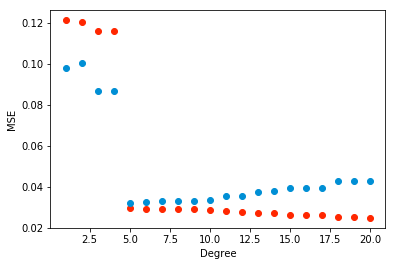

In [21]:
plt.plot(range(1,21), mse_train, 'o', color=red)
plt.plot(range(1,21), mse_test, 'o', color=blue)
plt.xlabel('Degree')
plt.ylabel('MSE')

In [22]:
min_train_mse = min(mse_train)
min_test_mse = min(mse_test)

In [23]:
print(min_train_mse, min_test_mse)

0.024833781487058403 0.03234864152603839


*Hint*: You should see the `min_train_mse < min_test_mse` since we have a bit of overfitting. Run the grader cell below! Each of the variables is worth 1 point; we assign points based on how close you are to the true answer

In [24]:
grader.grade(test_case_id = 'test_min_mses_test', answer = (min_train_mse, min_test_mse))

Correct! You earned 2.0/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### A6. 
From your plot, make an educated guess about the polynomial degree of the function that
was used to generate the data. Then, give an estimate of the irreducible error $Var(\epsilon)$ for the optimal model on both the training set and test set. 

*Hint*: The optimal model is obtained when we use the maximal degree polynomial that does not overfit. Revisit the section on hypothesis testing and think about the relationship between MSE, RSS, and RSE to calculate the irreducible error.

In [25]:
#From the plot, it looks like the polynomial degree of the function that was used to generate the data is 5.
#var = sigma^2, RSE = sigma, MSE = 1/N * RSS,so RSS = MSE * N
degree = 5
N_train = len(data['x_tr'])
N_test = len(data['x_te'])
RSS_tr = min_train_mse * N_train
RSS_te = min_test_mse * N_test
# RSE_train_sq = RSS_tr / (N_train - degree - 1) 
RSE_train_sq = RSS_tr / (N_train - 20 - 1) 
RSE_test_sq = RSS_te / (N_test - degree - 1)


Please set your respective irreducible errors as `RSE_train_sq` and `RSE_test_sq` respectively, and set the number of polynomial features as `degree`. Then, run the grader cell below. It grades similar to above, but we add 1 point for the `degree` variable!

In [26]:
print("Desired degree for best model: ", degree)
print("Irreducible error (training): ", RSE_train_sq)
print("Irreducible error (test): ", RSE_test_sq)

Desired degree for best model:  5
Irreducible error (training):  0.03143516643931443
Irreducible error (test):  0.034413448431955734


In [27]:
grader.grade(test_case_id = 'test_irreducible', answer = (degree, RSE_train_sq, RSE_test_sq))

Correct! You earned 3.0/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Part B

Next, we will use the `Ch3PartB` dataset to observe the effects of collinearity using `statsmodels`.
This dataset contains 100 observations of points $(x1, x2)$, and $y$, the response variable.

### B1. 
Load the data from `Ch3PartB.csv` into a pandas DataFrame.

In [28]:
dataB = pd.read_csv('Ch3PartB.csv')
dataB

,Unnamed: 0,x1,x2,y
0,0,0.417022,0.240074,2.949735
1,1,0.720324,0.157942,3.261717
2,2,0.000114,-0.030563,3.322517
3,3,0.302333,0.233964,2.387546
4,4,0.146756,0.096387,3.002498
...,...,...,...,...
95,95,0.237027,-0.071123,1.719446
96,96,0.903380,0.386998,4.758863
97,97,0.573679,0.376988,4.803815
98,98,0.002870,0.254268,2.840827


### B2. 
Show a scatterplot displaying the relationship between $x1$ and $x2$ 

What is the correlation coefficient between $x1$ and $x2$? Compute the answer and store it as `correlation_variable` -- it should be a single floating-point number

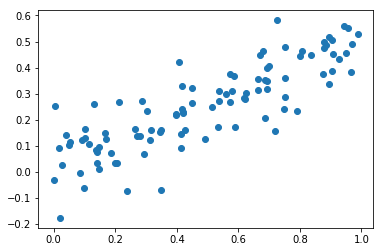

In [29]:
plt.plot(dataB[['x1']], dataB[['x2']], 'o')

In [30]:
correlation_variable = np.corrcoef(dataB['x1'], dataB['x2'])[0,1]
print(correlation_variable)

0.8390596222844913


In [31]:
grader.grade(test_case_id = 'test_correlation', answer = correlation_variable)

Correct! You earned 0.5/0.5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### B3. 

Using the data, fit a least squares regression to predict $y$ using $x1$ and $x2$. Describe your results in a Markdown cell. 

*Hint*: Familiarize yourself with `statsmodels.formula.api.ols`. 

We have several questions here as well:

(a) What are the estimates $\hat{\beta_0}, \hat{\beta_1}, \hat{\beta_2}$?

(b) At a 95% confidence level, can you reject the null hypothesis $H_0: \beta_1 = 0$? 

(c) What about $H_0: \beta_2 = 0$?

In [32]:
model = smf.ols('y~x1+x2',data=dataB).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     17.09
Date:                Sat, 21 Sep 2024   Prob (F-statistic):           4.40e-07
Time:                        17:11:14   Log-Likelihood:                -142.34
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      97   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1893      0.199     11.021      0.000       1.795       2.584
x1             0.7046      0.637      1.107      0.271      -0.559       1.968
x2             2.5024      1.140      2.194      0.031       0.239       4.766
==============================================================================
Omnibus:                        0.607   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.738   Jarque-Bera (JB):                0.577
Skew:                          -0.179   Prob(JB):                        0.749
Kurtosis:                       2.900   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For your answers to $\hat{\beta_0}, \hat{\beta_1}, \hat{\beta_2}$, please input them either using code or typing the numbers from `statsmodels`' output into the variables below. You should include at least 4 digits after the decimal point.

In [33]:
beta_0 = 2.1893
beta_1 = 0.7046
beta_2 = 2.5024

Please run but *do not change* the cell below to set up your autograder. Afterr, run the first grader cell with these variables! You will receive 0.5 points for each variable.

In [34]:
# DO NOT CHANGE THIS CELL!
answer_dict = {
    0: beta_0, 
    1: beta_1,
    2: beta_2
}

In [35]:
grader.grade(test_case_id = 'test_betas', answer = answer_dict)

Correct! You earned 1.5/1.5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Now, we want to evaluate the hypothesis test of $H_0: \beta_1 = 0$ when both $x1$ and $x2$ are present.

Please compute either the $t$-value or $p$-value and set it as `test_statistic_b1`, then determine whether or not you reject the null hypothesiss at the $95\%$ confidence level. Set that variable as a boolean (`True/False`) as `reject_null_b1`. 

If your values are either incorrect or do not agree (i.e. you said the null would be rejected when it should not be), then you will not receive full points!

You will receive 0.5 points for getting the correct statistics as well as 1 points for your in-context evaluation of the null hypothesis.

In [36]:
model.pvalues

Intercept    8.532403e-19
x1           2.712146e-01
x2           3.060418e-02
dtype: float64

In [37]:
test_statistic_b1 = .2712 # use t or p, to at least 3 significant digits
reject_null_b1 = False


In [38]:
grader.grade(test_case_id = 'test_beta1_hypothesis', answer = (test_statistic_b1, reject_null_b1))

Correct! You earned 1.5/1.5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Let's do the same for the other test, to evaluate the hypothesis test of $H_0: \beta_2 = 0$  when both $x1$ and $x2$ are present.

Please compute either the $t$-value or $p$-value and set it as `test_statistic_b2`, then determine whether or not you reject the null hypothesiss at the $95\%$ confidence level. Set that variable as a boolean (`True/False`) as `reject_null_b2`

You will receive 0.5 points for getting the correct statistics as well as 1 point for your in-context evaluation of the null hypothesis.

In [39]:
test_statistic_b2 = 0.030604 # use t or p, to at least 3 significant digits
reject_null_b2 = True #0.05 > 0.030


In [40]:
grader.grade(test_case_id = 'test_beta2_hypothesis', answer = (test_statistic_b2, reject_null_b2))

Correct! You earned 1.5/1.5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### B4. 

Now fit a least squares regression to predict $y$ using only $x1$. Comment on your results.

Can you reject the null hypothesis $H_0: \beta_1 = 0$?

In [41]:
model2 = smf.ols('y~x1', data=dataB).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     28.26
Date:                Sat, 21 Sep 2024   Prob (F-statistic):           6.68e-07
Time:                        17:11:25   Log-Likelihood:                -144.76
No. Observations:                 100   AIC:                             293.5
Df Residuals:                      98   BIC:                             298.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2486      0.201     11.209      0.000       1.850       2.647
x1             1.8770      0.353      5.316      0.000       1.176       2.578
==============================================================================
Omnibus:                        0.292   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.864   Jarque-Bera (JB):                0.468
Skew:                          -0.003   Prob(JB):                        0.791
Kurtosis:                       2.665   Cond. No.                         4.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

When evaluating $H_0: \beta_1 = 0$ when fitting with only $x1$ please do the following:

- Please compute either the $t$-value or $p$-value and set it as `test_statistic_b4`
- Determine whether or not you reject the null hypothesiss at the $95\%$ confidence level; set that variable as a boolean (`True/False`) as `reject_null_b4`
- Determine if $x1$ is significant; set that result as a boolean (`True/False`) as `is_x1_significant`

Similar to previously, you'll receive points both for your test statistics and the evaluation.

In [42]:
model2.tvalues

Intercept    11.209167
x1            5.315681
dtype: float64

In [43]:
test_statistic_b4 = 5.3156 # use t or p, to at least 3 significant digits
#t-statistic of 2 or higher is statistically significant, we can reject null hypothesis
reject_b4_null_hypothesis = True
is_x1_significant = True


In [44]:
grader.grade(test_case_id = 'test_b4_x1_hypothesis', answer = (
    test_statistic_b4, 
    reject_b4_null_hypothesis, 
    is_x1_significant)
)

Correct! You earned 1.5/1.5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### B5. 

Now fit a least squares regression to predict $y$ using only $x2$. Comment on your results.

Can you reject the null hypothesis $H_0: \beta_2 = 0$?

In [45]:
model3 = smf.ols('y~x2', data=dataB).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.87
Date:                Sat, 21 Sep 2024   Prob (F-statistic):           1.09e-07
Time:                        17:11:30   Log-Likelihood:                -142.97
No. Observations:                 100   AIC:                             289.9
Df Residuals:                      98   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2655      0.187     12.145      0.000       1.895       2.636
x2             3.5613      0.621      5.733      0.000       2.329       4.794
==============================================================================
Omnibus:                        0.857   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.651   Jarque-Bera (JB):                0.746
Skew:                          -0.210   Prob(JB):                        0.689
Kurtosis:                       2.946   Cond. No.                         6.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

When evaluating $H_0: \beta_2 = 0$ when fitting with only $x1$ please do the following:

- Please compute either the $t$-value or $p$-value and set it as `test_statistic_b5`
- Determine whether or not you reject the null hypothesiss at the $95\%$ confidence level; set that variable as a boolean (`True/False`) as `reject_null_b5`
- Determine if $x2$ is significant; set that result as a boolean (`True/False`) as `is_x2_significant`

Scoring is identical to B4 above!

In [46]:
model3.tvalues

Intercept    12.145167
x2            5.733353
dtype: float64

In [47]:
test_statistic_b5 = 5.7333 # use t or p, to at least 3 significant digits
#THe t-statisic is again bigger than 2 so it is significant.
reject_b5_null_hypothesis = True
is_x2_significant = True


In [48]:
grader.grade(test_case_id = 'test_b5_x2_hypothesis', answer = (
    test_statistic_b5, 
    reject_b5_null_hypothesis, 
    is_x2_significant)
)

Correct! You earned 1.5/1.5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### B6. 

Do Part B Questions 3-5 contradict each other? Explain why or why not. 

In [49]:
#The questions seem to contradict each other because beta_1 in the multiple regression was not significant. However, because of collinearity, these 2 predicters were closely related causing this reading.

Now, comment on the apparent contradiction below. Enter a boolean (`True/False`) for whether or not the answers contradict as `is_contradiction`, and then record your explanation into the multiline string named `contradiction_string` and then submit it to us via the grader cell!

Please note that you'll need to have the right answer as well as have an explanation that has a reasonable set of keywords in order to get full credit!

*Note*: if you have an explanation that you think is reasonable but you aren't passing the autograder, let us know on Piazza!

In [50]:
is_contradiction = False
contradiction_string = '''
The questions seem to contradict each other because beta_1 in the multiple regression was not significant. However, this is false because of collinearity, these 2 predicters were closely related causing the variables to lose there statistical significance.
'''


In [51]:
grader.grade(test_case_id = 'test_contradiction_test', answer = (is_contradiction, contradiction_string))

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Submit

You're done! Please make sure you've run all the PennGrader cells and count up your score to be sure (there are 20 points in total) and then make sure to submit this on Codio.